In [1]:
import rasterio
import numpy as np
import geopandas as gpd
from rasterio.features import shapes
from shapely.geometry import shape
import os

In [2]:
os.chdir("/nfs/a161/gy17m2a/PhD/FloodModelling/WykeBeckModels/LandCoverData/LandCoverData")

/nfs/a321/gy17m2a/anaconda_install/anaconda3/envs/pygeospatial/lib/python3.9/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


<Axes: >

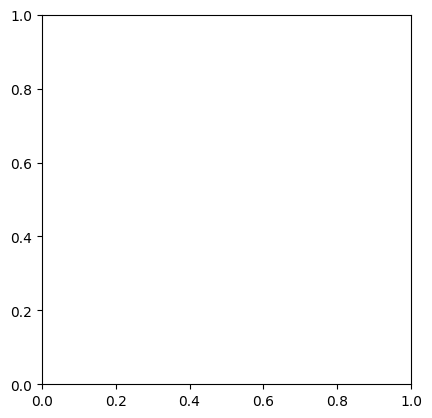

In [14]:
# Define the target land cover class (e.g., class 3)
target_class =12

# Read the raster file
with rasterio.open("LandCover_resized.tif") as src:
    landcover = src.read(1)  # Read the first band
    transform = src.transform  # Get the affine transformation
    
# Create a binary mask where the land cover equals the target class
mask = landcover == target_class

# Convert the mask into polygons
shapes_gen = shapes(landcover, mask=mask, transform=transform)

# Convert to a list of shapely geometries
polygons = [shape(geom) for geom, value in shapes_gen]

# Create a GeoDataFrame to store the vector outlines
gdf = gpd.GeoDataFrame(geometry=polygons, crs="EPSG:27700")
gdf.plot()

# # Save as a shapefile (optional)
# gdf.to_file("landcover_class_outline.shp")

# # Display the GeoDataFrame
# print(gdf)
